<a href="https://colab.research.google.com/github/HarshNVyas/ML-Algorithms-Pipeline/blob/main/Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Pre-processing in Python**

Data preprocessing is a critical step in the data science and machine learning workflow. It involves cleaning, transforming, and organizing raw data into a format suitable for analysis and modeling. In Python, the two primary libraries used for data preprocessing are Scikit-Learn and Pandas.

**Pandas** is a powerful data manipulation and analysis library that allows you to load, explore, and manipulate datasets. It provides essential data structures like DataFrames and Series, making it easy to perform tasks like data cleaning, handling missing values, and data transformation.

**Scikit-Learn**, often referred to as sklearn, is a popular machine learning library that offers a wide range of tools for data preprocessing and model building. While it's renowned for its machine learning algorithms, Scikit-Learn also includes preprocessing modules for standardizing data, encoding categorical variables, and splitting data into training and testing sets.

The data preprocessing pipeline typically includes tasks such as:

1. **Data Loading:** Reading data from various sources like CSV files, Excel spreadsheets, databases, or web APIs using Pandas.
2. **Data Exploration:** Gaining an initial understanding of the dataset through summary statistics, visualizations, and data profiling.
3. **Handling Missing Data:** Identifying and filling in missing values to avoid bias in analysis or modeling.
4. **Feature Engineering:** Creating new features, transforming existing ones, and encoding categorical variables to improve model performance.
5. **Data Scaling:** Standardizing or normalizing numerical features to ensure that they are on a similar scale.
6. **Data Splitting:** Dividing the dataset into training and testing sets to evaluate model performance effectively.

## Importing the data

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('car-sales-missing-data.csv')
df.head()

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.0,4.0,"$4,000"
1,Honda,Red,87899.0,4.0,"$5,000"
2,Toyota,Blue,NaN,3.0,"$7,000"
3,BMW,Black,11179.0,5.0,"$22,000"
4,Nissan,White,213095.0,4.0,"$3,500"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Make      9 non-null      object 
 1   Colour    9 non-null      object 
 2   Odometer  6 non-null      float64
 3   Doors     9 non-null      float64
 4   Price     8 non-null      object 
dtypes: float64(2), object(3)
memory usage: 528.0+ bytes


In [ ]:
len(df)

10

**NOTE:** The data is absent in the `car-sales-missing-data.csv` file. This is evident when we observe that the file contains 10 rows (as seen in `len(df)`), but the `df.info()` output indicates that there are fewer than 10 entries in each column. To address this issue, we will employ various data preprocessing methods.

## **Handling missing values**

### **isna and notna (Pandas)**
**DataFrame.isna**  => Return True for missing values.

**DataFrame.notna** => Return True for non-missing values.

In [ ]:
df.isna()

,Make,Colour,Odometer,Doors,Price
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,True,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,True,False,False
6,False,True,True,False,False
7,False,False,True,False,True
8,False,False,False,True,True
9,True,False,False,False,False


**NOTE:** by employing `df.isna().sum()`, you can determine the total count of missing values in each column.

In [ ]:
df.isna().sum()

Make        1
Colour      1
Odometer    4
Doors       1
Price       2
dtype: int64

In [ ]:
df.notna()

,Make,Colour,Odometer,Doors,Price
0,True,True,True,True,True
1,True,True,True,True,True
2,True,True,False,True,True
3,True,True,True,True,True
4,True,True,True,True,True
5,True,True,False,True,True
6,True,False,False,True,True
7,True,True,False,True,False
8,True,True,True,False,False
9,False,True,True,True,True


### **fillna and dropna (Pandas)**
**DataFrame.fillna()** => Replaces nan values with value

**DataFrame.dropna()** => Drop rows/columns containing nan values


**NOTE**: Set 'inplace=True' if changes need to be made on DataFrame.

In [ ]:
df.dropna()

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.0,4.0,"$4,000"
1,Honda,Red,87899.0,4.0,"$5,000"
3,BMW,Black,11179.0,5.0,"$22,000"
4,Nissan,White,213095.0,4.0,"$3,500"


In [ ]:
df

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.0,4.0,"$4,000"
1,Honda,Red,87899.0,4.0,"$5,000"
2,Toyota,Blue,NaN,3.0,"$7,000"
3,BMW,Black,11179.0,5.0,"$22,000"
4,Nissan,White,213095.0,4.0,"$3,500"
5,Toyota,Green,NaN,4.0,"$4,500"
6,Honda,NaN,NaN,4.0,"$7,500"
7,Honda,Blue,NaN,4.0,NaN
8,Toyota,White,60000.0,NaN,NaN
9,NaN,White,31600.0,4.0,"$9,700"


**NOTE**: Since we didn't set 'inplace=True' for 'df.dropna()', the results for 'df' return the original dataframe without any changes.

In [ ]:
df.dropna(axis='columns')

""
0
1
2
3
4
5
6
7
8
9


**NOTE**: As all columns contain missing values, using `DataFrame.dropna(axis='columns')` results in an empty DataFrame with no values.

In [ ]:
df

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.0,4.0,"$4,000"
1,Honda,Red,87899.0,4.0,"$5,000"
2,Toyota,Blue,NaN,3.0,"$7,000"
3,BMW,Black,11179.0,5.0,"$22,000"
4,Nissan,White,213095.0,4.0,"$3,500"
5,Toyota,Green,NaN,4.0,"$4,500"
6,Honda,NaN,NaN,4.0,"$7,500"
7,Honda,Blue,NaN,4.0,NaN
8,Toyota,White,60000.0,NaN,NaN
9,NaN,White,31600.0,4.0,"$9,700"


**NOTE:** if you want to remove rows containing 'NaN' values in a specific column, you can achieve this by utilizing the `df.dropna()` function with the `subset=['column_name']` parameter, as demonstrated in the following code snippet:

In [ ]:
df.dropna(subset=['Doors'], inplace=True)
df

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.0,4.0,"$4,000"
1,Honda,Red,87899.0,4.0,"$5,000"
2,Toyota,Blue,NaN,3.0,"$7,000"
3,BMW,Black,11179.0,5.0,"$22,000"
4,Nissan,White,213095.0,4.0,"$3,500"
5,Toyota,Green,NaN,4.0,"$4,500"
6,Honda,NaN,NaN,4.0,"$7,500"
7,Honda,Blue,NaN,4.0,NaN
9,NaN,White,31600.0,4.0,"$9,700"


In [ ]:
df.fillna(0)

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.0,4.0,"$4,000"
1,Honda,Red,87899.0,4.0,"$5,000"
2,Toyota,Blue,0.0,3.0,"$7,000"
3,BMW,Black,11179.0,5.0,"$22,000"
4,Nissan,White,213095.0,4.0,"$3,500"
5,Toyota,Green,0.0,4.0,"$4,500"
6,Honda,0,0.0,4.0,"$7,500"
7,Honda,Blue,0.0,4.0,0
9,0,White,31600.0,4.0,"$9,700"


**NOTE:** Every NaN vlaue is replaced by 0.

**NOTE:** You can use the method parameter to fill values in the DataFrame. There are three available options:

When method='ffill', it fills NaN values using the observation from above.

When method='bfill', it fills NaN values using the observation from below.

By default, when method is set to 'None', it remains as None.

In [ ]:
df.fillna(method='ffill')

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.0,4.0,"$4,000"
1,Honda,Red,87899.0,4.0,"$5,000"
2,Toyota,Blue,87899.0,3.0,"$7,000"
3,BMW,Black,11179.0,5.0,"$22,000"
4,Nissan,White,213095.0,4.0,"$3,500"
5,Toyota,Green,213095.0,4.0,"$4,500"
6,Honda,Green,213095.0,4.0,"$7,500"
7,Honda,Blue,213095.0,4.0,"$7,500"
9,Honda,White,31600.0,4.0,"$9,700"


In [ ]:
df.fillna(method='bfill')

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.0,4.0,"$4,000"
1,Honda,Red,87899.0,4.0,"$5,000"
2,Toyota,Blue,11179.0,3.0,"$7,000"
3,BMW,Black,11179.0,5.0,"$22,000"
4,Nissan,White,213095.0,4.0,"$3,500"
5,Toyota,Green,31600.0,4.0,"$4,500"
6,Honda,Blue,31600.0,4.0,"$7,500"
7,Honda,Blue,31600.0,4.0,"$9,700"
9,NaN,White,31600.0,4.0,"$9,700"


**NOTE**: To replace specific columns with designated values, you can utilize a Dictionary to associate particular values with corresponding columns. Subsequently, you can assign this Dictionary to the df.fillna() function by specifying the value parameter, as demonstrated in the code snippet below:

In [ ]:
values = {"Make":"Toyota", "Colour":"White", "Odometer":60000, "Doors":4, "Price":8000}
df.fillna(value=values)

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.0,4.0,"$4,000"
1,Honda,Red,87899.0,4.0,"$5,000"
2,Toyota,Blue,60000.0,3.0,"$7,000"
3,BMW,Black,11179.0,5.0,"$22,000"
4,Nissan,White,213095.0,4.0,"$3,500"
5,Toyota,Green,60000.0,4.0,"$4,500"
6,Honda,White,60000.0,4.0,"$7,500"
7,Honda,Blue,60000.0,4.0,8000
9,Toyota,White,31600.0,4.0,"$9,700"


**NOTE:** Note: To fill NaN values with the mean, median, or mode, you can select the column containing the NaN values that you want to replace and assign the value using this syntax: `Dataframe['Column'].fillna(value=Dataframe['Column'].mean())`.

Additionally, if you want to make permanent changes to the table, use the `inplace=True` parameter. For example, in the code snippet below, it fills NaN values in the 'Odometer' column with the mean and makes the changes directly in the DataFrame:

In [ ]:
df['Odometer'].fillna(value=df['Odometer'].mean(), inplace=True)
df

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.0,4.0,"$4,000"
1,Honda,Red,87899.0,4.0,"$5,000"
2,Toyota,Blue,98763.2,3.0,"$7,000"
3,BMW,Black,11179.0,5.0,"$22,000"
4,Nissan,White,213095.0,4.0,"$3,500"
5,Toyota,Green,98763.2,4.0,"$4,500"
6,Honda,NaN,98763.2,4.0,"$7,500"
7,Honda,Blue,98763.2,4.0,NaN
9,NaN,White,31600.0,4.0,"$9,700"


First, let's address the missing values to prepare the data for the next step, which involves removing duplicate entries as part of the data preprocessing.

In [ ]:
df['Colour'].fillna("Red", inplace=True)
df

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.0,4.0,"$4,000"
1,Honda,Red,87899.0,4.0,"$5,000"
2,Toyota,Blue,98763.2,3.0,"$7,000"
3,BMW,Black,11179.0,5.0,"$22,000"
4,Nissan,White,213095.0,4.0,"$3,500"
5,Toyota,Green,98763.2,4.0,"$4,500"
6,Honda,Red,98763.2,4.0,"$7,500"
7,Honda,Blue,98763.2,4.0,NaN
9,NaN,White,31600.0,4.0,"$9,700"


In [ ]:
df['Make'].fillna("Honda", inplace=True)
df

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.0,4.0,"$4,000"
1,Honda,Red,87899.0,4.0,"$5,000"
2,Toyota,Blue,98763.2,3.0,"$7,000"
3,BMW,Black,11179.0,5.0,"$22,000"
4,Nissan,White,213095.0,4.0,"$3,500"
5,Toyota,Green,98763.2,4.0,"$4,500"
6,Honda,Red,98763.2,4.0,"$7,500"
7,Honda,Blue,98763.2,4.0,NaN
9,Honda,White,31600.0,4.0,"$9,700"


**NOTE:** `df.info()` is used to find datatype of all the features present in the DataFrame.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9 entries, 0 to 9
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Make      9 non-null      object 
 1   Colour    9 non-null      object 
 2   Odometer  9 non-null      float64
 3   Doors     9 non-null      float64
 4   Price     8 non-null      object 
dtypes: float64(2), object(3)
memory usage: 432.0+ bytes


In [ ]:
df = df['Price'].astype(int)

ValueError: ignored

**NOTE:** The code snippet above generates an error due to the data type of the 'Price' column, which is set as an 'object,' and the presence of the '$' sign in the data. This configuration prevents the straightforward conversion of the data into an integer or a float.

To resolve this issue, the first step is to remove the '$' sign and any commas (',') from the 'Price' column using the `.str.replace()` method. Subsequently, the data can be successfully converted into a floating-point format. It is important to note that attempting to convert this data into an integer is not feasible, primarily because the 'Price' column contains NaN (Not-a-Number) values, which cannot be represented as integers.


In [ ]:
df['Price'] = df['Price'].str.replace('$', '').str.replace(',', '')
df['Price'] = df['Price'].astype(float)

<ipython-input-22-c47bc60e3027>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Price'] = df['Price'].str.replace('$', '').str.replace(',', '')


In [ ]:
df

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.0,4.0,4000.0
1,Honda,Red,87899.0,4.0,5000.0
2,Toyota,Blue,98763.2,3.0,7000.0
3,BMW,Black,11179.0,5.0,22000.0
4,Nissan,White,213095.0,4.0,3500.0
5,Toyota,Green,98763.2,4.0,4500.0
6,Honda,Red,98763.2,4.0,7500.0
7,Honda,Blue,98763.2,4.0,NaN
9,Honda,White,31600.0,4.0,9700.0


### **SimpleImputer (Sklearn)**

An alternative method to handle missing data in columns involves the use of SimpleImputer from the scikit-learn library. While fillna and dropna are simpler approaches, SimpleImputer offers a more robust solution and is often preferred in industrial applications. It provides several strategies for imputing missing values:

1. **Mean:** It computes the mean of the non-missing values in the column using `SimpleImputer(strategy='mean')`.
2. **Median:** It calculates the median of the non-missing values in the column with `SimpleImputer(strategy='median')`.
3. **Most Frequent (Mode):** This strategy replaces missing values with the most frequent value in the column via `SimpleImputer(strategy='most_frequent')`.
4. **Constant:** You can also specify a constant value to replace missing entries, as demonstrated in `SimpleImputer(strategy='constant', fill_value=-1)`.

After choosing your preferred imputation strategy, the next steps involve applying the imputer to your dataset. The initial step is fitting the imputer to the specific column, a process that involves analyzing the available non-missing values and calculating relevant statistics using the following code:  `imputer.fit(DataFrame[['Column_name']])`

Once the imputer is appropriately fitted, the subsequent step involves utilizing the derived statistics to update your dataset. This is accomplished by transforming the column through the following code: `imputer.transform(DataFrame[['Column_name']])`. This transformation effectively replaces missing values with the calculated statistics, ensuring your data is complete and ready for analysis or further processing.

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
imputer.fit(df[['Price']])
df['Price'] = imputer.transform(df[['Price']])
df

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.0,4.0,4000.0
1,Honda,Red,87899.0,4.0,5000.0
2,Toyota,Blue,98763.2,3.0,7000.0
3,BMW,Black,11179.0,5.0,22000.0
4,Nissan,White,213095.0,4.0,3500.0
5,Toyota,Green,98763.2,4.0,4500.0
6,Honda,Red,98763.2,4.0,7500.0
7,Honda,Blue,98763.2,4.0,6000.0
9,Honda,White,31600.0,4.0,9700.0


## **Removing Duplicates**

### **duplicated and drop_duplicate (Pandas)**

1. `DataFrame.duplicated()` => This method returns True for rows that are duplicated.
2. `DataFrame.drop_duplicate()` => It is used to remove all duplicate values from the dataframe.

In [ ]:
df.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
9    False
dtype: bool

In all the columns, the label 'False' signifies the absence of duplicate values in the dataset. Consequently, given the absence of duplicates, the application of `df.drop_duplicates()` will not result in the removal of any rows.

In [ ]:
df.drop_duplicates(inplace=True)
df

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.0,4.0,4000.0
1,Honda,Red,87899.0,4.0,5000.0
2,Toyota,Blue,98763.2,3.0,7000.0
3,BMW,Black,11179.0,5.0,22000.0
4,Nissan,White,213095.0,4.0,3500.0
5,Toyota,Green,98763.2,4.0,4500.0
6,Honda,Red,98763.2,4.0,7500.0
7,Honda,Blue,98763.2,4.0,6000.0
9,Honda,White,31600.0,4.0,9700.0


## **Remove Ouliers**

Removing outliers from a dataset involves identifying and handling data points that significantly deviate from the rest of the data. There are several methods to address outliers:

1. **Visual Inspection:** Plot your data using graphs like box plots, scatter plots, or histograms to identify data points that are far from the main cluster.

2. **Statistical Methods:** Use statistical measures to define outliers. The most common method is the Interquartile Range (IQR). Data points beyond a certain range from the first quartile (Q1) or the third quartile (Q3) are considered outliers and can be removed.

3. **Z-Score:** Calculate the Z-score for each data point, which measures how many standard deviations it is from the mean. Data points with a Z-score outside a certain range can be considered outliers.

4. **Machine Learning Models:** Train a machine learning model on your data and identify outliers based on prediction errors. (Not Covered)

5. **Domain Knowledge:** Sometimes, you may need to use your domain knowledge to identify what constitutes an outlier. For instance, in a temperature dataset, a reading of -50 degrees Celsius in a desert location would be an outlier.

### Visual Inspection (MatPlotLib)

The adage that '*Visualizing data is crucial because humans often struggle to grasp numerical information*' is a well-accepted notion in the realms of data analysis and communication.

In this section, we will employ the 'matplotlib' library to create graphs and facilitate data visualization.

In [ ]:
import matplotlib.pyplot as plt

<Axes: >

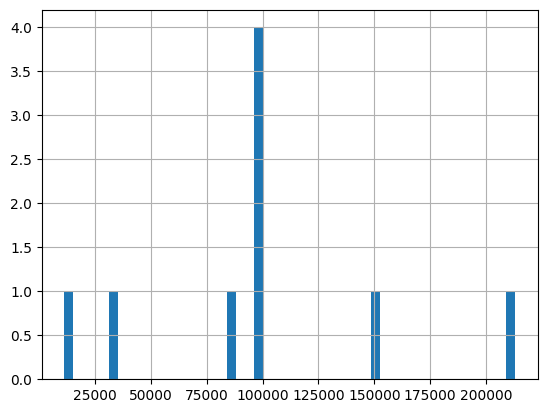

In [ ]:
df['Odometer'].hist(bins=50)

From the histogram, it is evident that there are four outliers in Odometer column: two near 25,000 and the others at 150,000 and 200,000.

<Axes: >

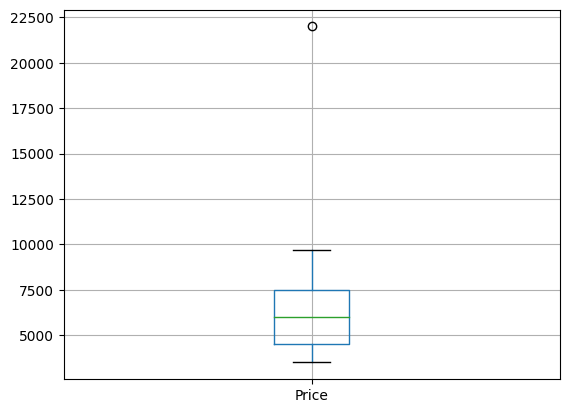

In [ ]:
df.boxplot(column=['Price'])

From the boxplot, it is evident that there is one outlier in Price column i.e. at 22500.

<Axes: xlabel='[Odometer]', ylabel='[Price]'>

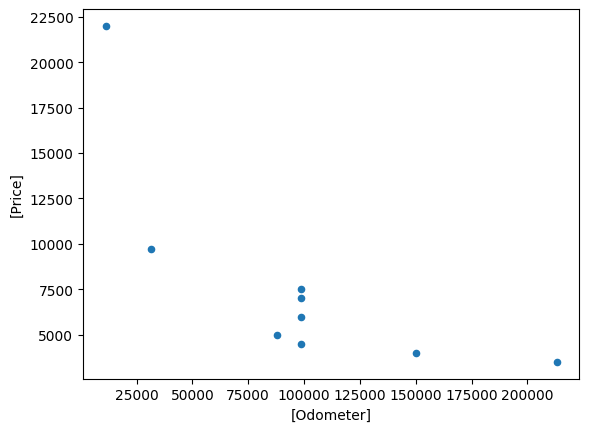

In [ ]:
df.plot.scatter(['Odometer'],['Price'])

From the graph above, we can confirm that there are 4 outliers in Odometer and One outlier in Price

### Statistical Methods (NumPy)

Statistical methods involve the application of mathematical algorithms to identify and remove outliers from a dataset. Outliers, which are data points significantly different from the majority, can distort the results and interpretations of statistical analyses. By employing statistical methods, researchers and analysts can enhance the accuracy and reliability of their findings, making the data-driven decisions and insights more robust and meaningful."

The initial step to find outlier using statistics is by finding Inter Quartile Range (IQR). It can be calculated as follows:

1. Organize your dataset in ascending order.

2. Calculate the first quartile (Q1), which is the 25th percentile. To find Q1, use the formula:
`Q1 = (n + 1) / 4`
where "n" is the number of data points in your dataset. If the result is not a whole number, round it up to the nearest whole number. This gives you the position of Q1 in your ordered dataset.

3. Calculate the third quartile (Q3), which is the 75th percentile. To find Q3, use the formula:
`Q3 = 3 * (n + 1) / 4`
where "n" is the number of data points. Again, if the result is not a whole number, round it up to the nearest whole number.

4. Calculate the IQR by subtracting Q1 from Q3:
`IQR = Q3 - Q1`

Let's find outliers in 'Price' column

In [ ]:
price = np.array(df['Price'])
price

# Step 1
price = np.sort(price, axis=0)
price

# Step 2 & 3
Q1 = np.percentile(price, 25)
Q2 = np.percentile(price, 50)
Q3 = np.percentile(price, 75)

# Step 4
IQR = Q3-Q1

IQR

3000.0

Note: By following the steps outlined above for calculating the Interquartile Range (IQR), we obtained a value of 3000.0 for the 'Price' column.

Now, let's proceed to find the upper and lower limits using the following formulas:

1. `Upper Limit = Quartile 3 (Q3) + 1.5 x IQR`
2. `Lower Limit = Quartile 1 (Q1) - 1.5 x IQR`

The upper and lower limits are essential for identifying potential outliers in the data, which can be crucial in various statistical analyses and data quality assessments

In [ ]:
Upper = Q3+1.5*IQR
Lower = Q1-1.5*IQR

Upper, Lower

(12000.0, 0.0)

Now that we have determined the upper and lower limits, we can identify outliers by examining the values that fall outside this range. The code snippet below demonstrates the process of checking for outliers. In this specific example, we discover that the value [22000.0] is the only outlier within the 'Price' column.

In [ ]:
Outlier = []

for i in price:
  if i<Lower or i>Upper:
    Outlier.append(i)

Outlier

[22000.0]

**NOTE:** Outliers in the data can be confirmed using a box plot. In this case, both the data distribution and the box plot indicate the presence of an outlier at the value 22000.0.

### Z Score (NumPy)

The Z-score and the empirical rule can be used to identify outliers in a dataset by detecting data points that fall significantly far from the mean. The Z-score measures how many standard deviations a data point is away from the mean, and the empirical rule provides guidance on what constitutes a significant deviation. Here's how to use them:

Calculate the Z-scores for each data point using the formula:

`Z = (X - μ) / σ`

Where:

Z is the Z-score.
X is the data point.
μ is the mean (average) of the dataset.
σ is the standard deviation of the dataset.
Apply the empirical rule:

1. Approximately **68%** of the data falls within 1 standard deviation of the mean (i.e., |Z| < 1).
2. Approximately **95%** of the data falls within 2 standard deviations of the mean (i.e., |Z| < 2).
3. Approximately **99.7%** of the data falls within 3 standard deviations of the mean (i.e., |Z| < 3).
Identify outliers:

Data points with Z-scores greater than 3 or less than -3 are considered outliers based on the empirical rule. These are data points that are unusually far from the mean and may be considered extreme values.


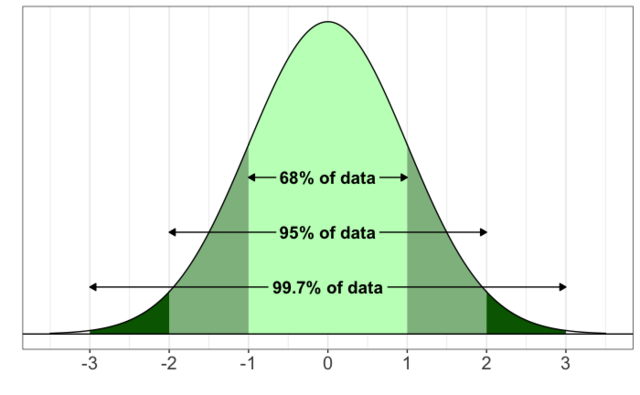

*https://upload.wikimedia.org/wikipedia/commons/d/df/08fig-empirical.png*

**NOTE:** When dealing with a dataset, it's important to recognize that the data closely approximates a normal distribution when the dataset size exceeds 30. In our specific scenario, the dataset consists of only 10 data points. While the effectiveness of this concept is somewhat limited with such a small dataset, we will still apply it for analysis.

Elaboration:
The note emphasizes the influence of dataset size on the assumption of a normal distribution. Typically, when working with data, statistical analyses and tests that assume a normal distribution are more reliable with larger datasets, where the Central Limit Theorem tends to hold. In our case, the dataset contains only 10 data points, which is relatively small. As a result, the dataset may not perfectly conform to the characteristics of a normal distribution. However, even with a smaller dataset, we will apply the concept of normal distribution as a simplifying approximation for our analysis, understanding that the results may not be as robust as with larger datasets. This highlights the need for cautious interpretation when dealing with smaller sample sizes in statistical analysis.

In [ ]:
price = np.array(df['Price'])
price

array([ 4000.,  5000.,  7000., 22000.,  3500.,  4500.,  7500.,  6000.,
        9700.])

Let's start with finding values of mean(μ) and std(σ)

In [ ]:
mean = np.mean(price)
std = np.std(price)

mean, std

(7688.888888888889, 5382.780042659585)

Let's consider a scenario where we aim to identify **5%** of the data as outliers. To achieve this, our focus will be on the **95%** Confidence Interval (CI). In accordance with the Empirical Rule, data points lying beyond the range of `one mean ± 2 times the standard deviation` can be classified as outliers. In other words, we're concentrating on the central 95% of the data distribution, leaving the remaining 5% as potential outliers that fall outside this range. This approach provides a statistical framework for detecting and addressing data points that significantly deviate from the norm.

In [ ]:
Upper = mean+2*std
Lower = mean-2*std

Upper, Lower

(18454.44897420806, -3076.6711964302813)

In [ ]:
Outlier = []

for i in price:
  if i<Lower or i>Upper:
    Outlier.append(i)

Outlier

[22000.0]

From all the 3 methods, we found that [22000.0] is an outlier.

### Domain Knowlwdge

Domain knowledge is essentially intuition or insight gained from experience. It allows us to establish a reasonable range of values within which data points are considered normal, while those falling outside this range are treated as outliers. For instance, in the context of housing prices, we might know that they cannot realistically exceed \$19,000 or drop below $500. By using this domain knowledge, we can identify outliers by implementing the following code:

In [ ]:
Upper = 19000
Lower = 500

Outlier = []

for i in price:
  if i<Lower or i>Upper:
    Outlier.append(i)

Outlier

[22000.0]

This code effectively identifies outliers in a dataset, where housing prices that are either below \$500 or above $19,000 are considered outside the expected and valid range, in accordance with our domain knowledge.:

In [ ]:
Outlier

[22000.0]

In [ ]:
df = df[~df['Price'].isin(Outlier)]
df

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.0,4.0,4000.0
1,Honda,Red,87899.0,4.0,5000.0
2,Toyota,Blue,98763.2,3.0,7000.0
4,Nissan,White,213095.0,4.0,3500.0
5,Toyota,Green,98763.2,4.0,4500.0
6,Honda,Red,98763.2,4.0,7500.0
7,Honda,Blue,98763.2,4.0,6000.0
9,Honda,White,31600.0,4.0,9700.0


## **Data Encoding in Data Preprocessing**

Data encoding is a fundamental step in the data preprocessing process. It plays a critical role in converting categorical data into a format that is compatible with machine learning and neural networks. Categorical data can be further categorized into two distinct types:

1. **Nominal Data:** This type of data lacks any inherent order or ranking. It consists of categories that are distinguishable but not ordered. For instance, consider the blood group categories like A+ve or B-ve. These categories do not have a natural sequence associated with them.

2. **Ordinal Data:** Ordinal data, on the other hand, carries a specific order or ranking. In this case, the categories possess a meaningful sequence. A classic example is the rating of a movie, where the order ranges from a minimum rating of 0 to a maximum rating of 5.

**Why Encoding is Necessary**

Machine learning algorithms and neural networks operate with numeric data. They do not comprehend textual or categorical labels; instead, they rely on numerical values for processing. Therefore, to make categorical data usable for these systems, a conversion process known as encoding is required.

**Common Encoding Techniques**

There are several techniques for encoding categorical data, each with its own advantages and best-use scenarios. Here, we will explore four prominent encoding methods:

1. **One-Hot Encoding:** This technique creates binary columns for each category, marking the presence (1) or absence (0) of the category for each data point.

2. **Dummy Encoding:** Similar to one-hot encoding, dummy encoding converts categorical variables into binary columns but uses one less column, making it more memory-efficient.

3. **Ordinal Encoding:** This method assigns numeric values to categories based on their predefined order. It is suitable for ordinal data where there is a clear ranking.

4. **Target Encoding:** In this approach, the categorical variable is replaced with the mean of the target variable for each category. It is often used in predictive modeling tasks.

By employing these encoding techniques, data scientists and machine learning practitioners can bridge the gap between categorical data and numerical models, making it possible to extract valuable insights and build effective predictive systems.

### One-Hot Encoding (Sklearn)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder(sparse=False, drop='first')
one_hot_encoder.fit_transform(df[['Make', 'Colour']])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 1., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 1.],
       [0., 1., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

### Dummy Encoding (Pandas)

In [ ]:
dummies = pd.get_dummies(df[['Make', 'Colour']], drop_first=True)
dummies

,Make_Nissan,Make_Toyota,Colour_Green,Colour_Red,Colour_White
0,0,1,0,0,1
1,0,0,0,1,0
2,0,1,0,0,0
4,1,0,0,0,1
5,0,1,1,0,0
6,0,0,0,1,0
7,0,0,0,0,0
9,0,0,0,0,1


### Ordinal Encoding (Sklearn)

In [ ]:
from sklearn.preprocessing import LabelEncoder

ordinal_encoder = LabelEncoder()
ordinal_encoder.fit_transform(df['Make'])

array([2, 0, 2, 1, 2, 0, 0, 0])

### Target Encoding (Sklearn)

In [ ]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 2.0 MB/s eta 0:00:00


In [ ]:
from category_encoders import TargetEncoder

target_encoder = TargetEncoder()
target_encoder.fit_transform(df[['Make', 'Colour']], df['Price'])

,Make,Colour
0,5786.725472,5874.255789
1,6093.178857,5949.647873
2,5786.725472,5985.110639
4,5587.739662,5874.255789
5,5786.725472,5717.848136
6,6093.178857,5949.647873
7,6093.178857,5985.110639
9,6093.178857,5874.255789


**NOTE:** The method for importing the TargetEncoder module has changed in comparison to sklearn. Initially, you could perform TargetEncoding with the command `from category_encoders import TargetEncoder`. However, the process now involves downloading the "category_encoders" library first, using the code `!pip install category_encoders`, and subsequently importing the TargetEncoder module using the code `from category_encoders import TargetEncoder`.

In [ ]:
df

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.0,4.0,4000.0
1,Honda,Red,87899.0,4.0,5000.0
2,Toyota,Blue,98763.2,3.0,7000.0
4,Nissan,White,213095.0,4.0,3500.0
5,Toyota,Green,98763.2,4.0,4500.0
6,Honda,Red,98763.2,4.0,7500.0
7,Honda,Blue,98763.2,4.0,6000.0
9,Honda,White,31600.0,4.0,9700.0


In [ ]:
df = pd.concat([df,dummies], axis=1)
df = df.drop(['Make', 'Colour'], axis=1)
df

,Odometer,Doors,Price,Make_Nissan,Make_Toyota,Colour_Green,Colour_Red,Colour_White
0,150043.0,4.0,4000.0,0,1,0,0,1
1,87899.0,4.0,5000.0,0,0,0,1,0
2,98763.2,3.0,7000.0,0,1,0,0,0
4,213095.0,4.0,3500.0,1,0,0,0,1
5,98763.2,4.0,4500.0,0,1,1,0,0
6,98763.2,4.0,7500.0,0,0,0,1,0
7,98763.2,4.0,6000.0,0,0,0,0,0
9,31600.0,4.0,9700.0,0,0,0,0,1


## **Standardization and Normalization**

### Standardization (Z-score normalization)
Standardization transforms the data so that it has a mean of 0 and a standard deviation of 1. It makes the data follow a standard normal distribution, which is particularly useful for algorithms that assume normally distributed data.

The formula for standardization is:
`Z = (X−μ)/σ`

Where

`X` is the data point,

`μ` is the mean, and

`σ` is the standard deviation.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit and transform the 'Odometer' and 'Price' columns
df[['Odometer', 'Price']] = scaler.fit_transform(df[['Odometer', 'Price']])

In [ ]:
df

,Odometer,Doors,Price,Make_Nissan,Make_Toyota,Colour_Green,Colour_Red,Colour_White
0,0.819618,4.0,-0.975321,0,1,0,0,1
1,-0.443266,4.0,-0.461994,0,0,0,1,0
2,-0.222485,3.0,0.564660,0,1,0,0,0
4,2.100954,4.0,-1.231985,1,0,0,0,1
5,-0.222485,4.0,-0.718658,0,1,1,0,0
6,-0.222485,4.0,0.821323,0,0,0,1,0
7,-0.222485,4.0,0.051333,0,0,0,0,0
9,-1.587368,4.0,1.950643,0,0,0,0,1


### **Normalization (Min-Max Scaling)**

Normalization is a data preprocessing technique that scales the data to a specific range, typically between 0 and 1, or any other specified range. It is especially useful when you want to maintain the original distribution of the data.

The formula for Min-Max scaling is:

$X_{new}$ = $\frac{X - min(X)}{max(X) - min(X)}$

Where:
- $X_{new}$ is the scaled value.
- $X$ is the original data point.
- $min(X)$ is the minimum value in the dataset.
- $max(X)$ is the maximum value in the dataset.

Min-Max scaling helps in bringing all values within a specified range, making the data suitable for various applications and algorithms.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler instance
scaler = MinMaxScaler()

# Fit and transform the 'Odometer' and 'Price' columns
scaler.fit_transform(df[['Odometer', 'Price']])

array([[0.65259649, 0.08064516],
       [0.31019587, 0.24193548],
       [0.37005537, 0.56451613],
       [1.        , 0.        ],
       [0.37005537, 0.16129032],
       [0.37005537, 0.64516129],
       [0.37005537, 0.40322581],
       [0.        , 1.        ]])

## **Dimentionality Reduction**

Dimensionality reduction is a technique in machine learning and data analysis that aims to reduce the number of features (dimensions) in a dataset while retaining the most important information. It's often used to mitigate the "curse of dimensionality," improve model performance, reduce computational complexity, and enhance interpretability.

### Principle Component Analysis (PCA)
One popular method for dimensionality reduction is Principal Component Analysis (PCA). PCA is a linear technique that identifies the principal components of the data, which are linear combinations of the original features. These principal components capture the maximum variance in the data. By selecting a subset of these components, you can effectively reduce dimensionality while preserving much of the data's variability.

**NOTE:** Before applying PCA, it's often a good practice to standardize the data so that all features have a mean of 0 and a standard deviation of 1. This step is important because PCA is sensitive to the scale of the data.

In [ ]:
from sklearn.decomposition import PCA

# Initialize PCA with the number of components you want to retain
n_components = 5  # Choose the number of components to retain
pca = PCA(n_components=n_components)

# Fit PCA to the standardized data
principal_components = pca.fit_transform(df)


In [ ]:
principal_components

array([[ 1.34056251,  0.12414327, -0.53918947, -0.25400667,  0.56959051],
       [-0.12379844,  0.31331336,  1.01266807, -0.12454785,  0.2562822 ],
       [-0.56976342,  0.44083108, -0.64866601,  0.89642618,  0.01146055],
       [ 2.49793152, -0.9974275 , -0.03885819,  0.06885664, -0.25745355],
       [ 0.36955615,  1.19663692, -0.19112389, -0.43299712, -0.32671474],
       [-0.8472335 , -0.29862098,  0.71735532,  0.34836186,  0.07319583],
       [-0.25667305,  0.01962481,  0.23283803, -0.04240246, -0.31857395],
       [-2.41058178, -0.79850095, -0.54502385, -0.45969056, -0.00778685]])

In [ ]:
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratios:", explained_variance)

Explained Variance Ratios: [0.63279112 0.14499995 0.11061324 0.05907052 0.02807027]
